In [13]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import Statevector
from IPython.display import display, Math, Latex
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt

<IPython.core.display.Latex object>

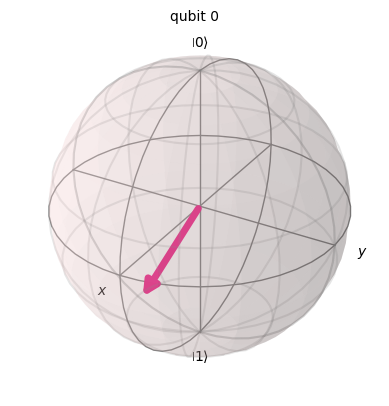

In [14]:
state_H = [1, 0]
state_V = [0, 1]
state_P = [1/sqrt(2), 1/sqrt(2)]
state_M = [1/sqrt(2), -1/sqrt(2)]
state_L = [1/sqrt(2), 1j/sqrt(2)]
state_R = [1/sqrt(2), -1j/sqrt(2)] 

state = [1, -4j]
euclidean_norm = sqrt(np.abs(state[0])**2 + np.abs(state[1])**2)
normalized_state = [state[0]/euclidean_norm , state[1]/euclidean_norm]
display(Statevector(normalized_state).draw(output='latex'))
display(plot_bloch_multivector(normalized_state))

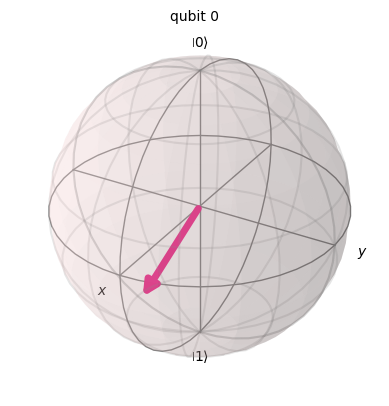

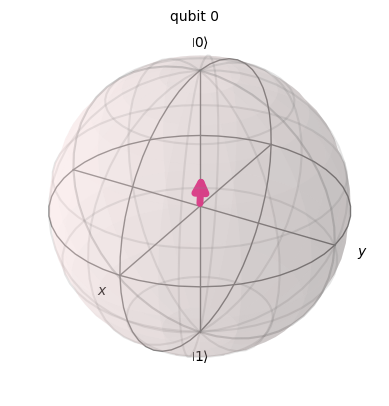

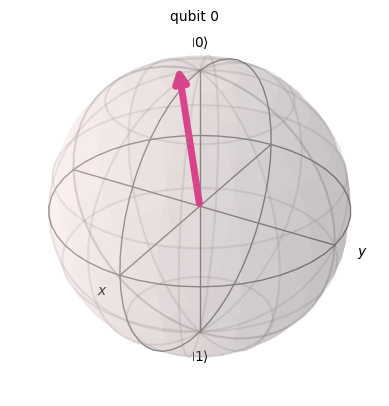

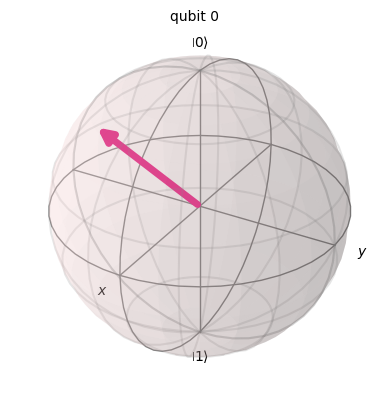

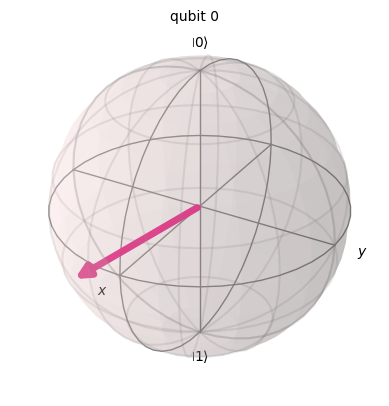

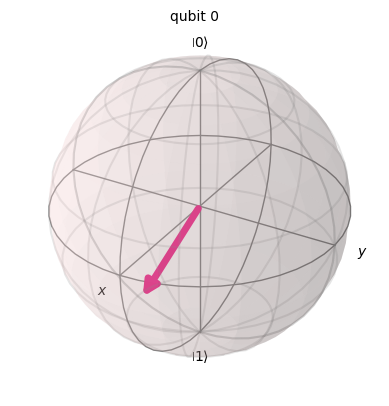

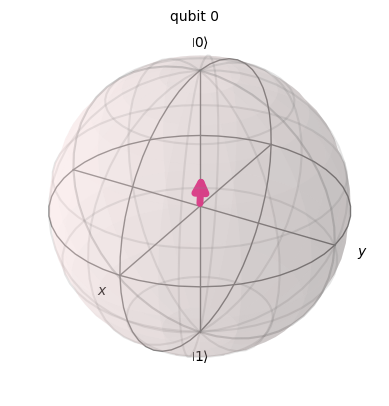

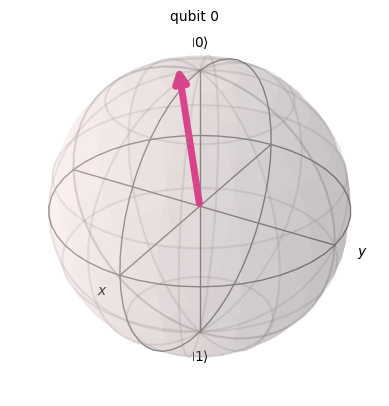

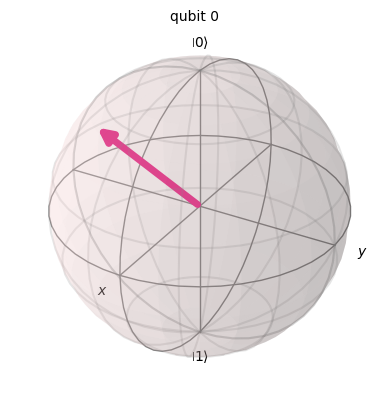

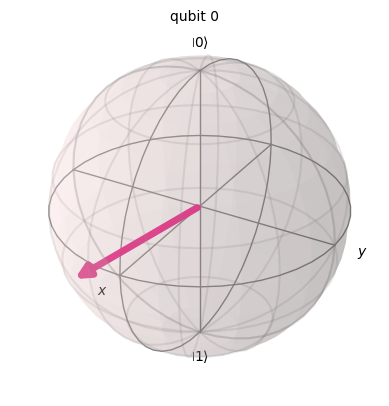

In [23]:
N = 10
qc = QuantumCircuit(1, 1)

for i in range(N):
    qc.clear()
    qc = QuantumCircuit(1, 1)
    qc.initialize(normalized_state, 0)
    
    delta = 4*i*pi/N
    qc.ry(delta, 0)
    qc.save_statevector()
    
    simulator = Aer.get_backend('aer_simulator')
    qc = transpile(qc, simulator)
                    
    result = simulator.run(qc).result()
    statevector = result.get_statevector(qc)
    figure = plot_bloch_multivector(statevector)
    display(figure)
    figure.clear()
